# Project 1 TAA

## Expression Recognition with Keras

### Load datasets from file

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

In [30]:
# labelNames = ["angry", "fear", "happy", "neutral", "sad", "surprise"]
labelNames = ["happy", "sad"]

# Load Training data
mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X, y = mat["X"], mat["y"]

# Load Dev Data
matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
X_valid, y_valid = matDev["X"], matDev["y"]

# Load Test Data
matTest=loadmat(f"../datasets/test/{'_'.join(labelNames)}.mat")
X_test, y_test = matTest["X"], matTest["y"]

In [31]:
# numbers
m = X.shape[0] # number of training examples
labels = np.max(y)+1 # number of labels
features = X.shape[1] # number of features per example

print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print(f"Loaded {X_valid.shape[0]} dev examples.")
print(f"Loaded {X_test.shape[0]} test examples.")

Loaded 2000 traing examples with 2 labels, each with 2304 features (pixels).
Labels are: happy, sad
Loaded 400 dev examples.
Loaded 400 test examples.


### Some examples

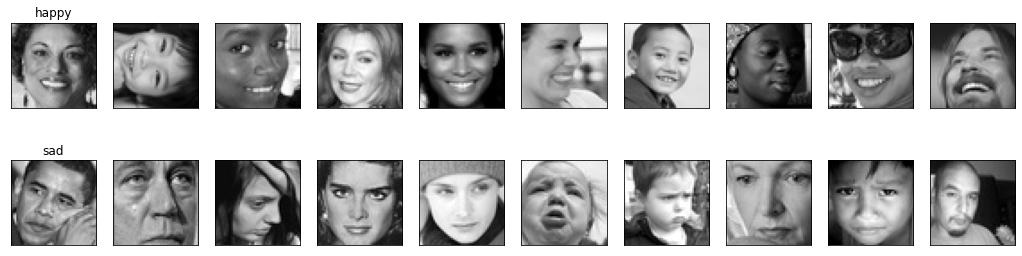

In [32]:
examplesNumber = 10
fig, axis = plt.subplots(labels,examplesNumber,figsize=(18,2*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images
for i in range(labels):
    for j in range(examplesNumber):
        # Show image
        axis[i,j].imshow(X[np.random.randint((m/labels)*(i),(m/labels)*(i+1)+1),:].reshape(48,48,order="F").T, cmap="gray") 
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i])

### The neural network

Based on https://medium.com/nerd-for-tech/how-to-train-neural-networks-for-image-classification-part-1-21327fe1cc1

In [33]:
# Important variables
iterations = 1500
hiddenLayers = [300,200,100,50]

#### Build the network

In [34]:
# Create model
modelSeq = []
# Flattens each image (48x48) to 1x2304
modelSeq.append(keras.layers.Flatten(input_shape = [48, 48]))
# Hidden layers with relu activation function
for h in hiddenLayers:
    modelSeq.append(keras.layers.Dense(h, activation = "relu" ))
# Output layer with softmax activation function
modelSeq.append(keras.layers.Dense(labels, activation = "softmax" ))

model = keras.models.Sequential(modelSeq)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               691500    
_________________________________________________________________
dense_16 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 102       
Total params: 776,952
Trainable params: 776,952
Non-trainable params: 0
________________________________________________

In [35]:
# Compile model

model.compile(
    # Using sparse categorical crossentropy loss function
    loss = "sparse_categorical_crossentropy",
    # Using stochastic gradient descent as gradient descent
    optimizer = "sgd",
    # In addition to cost, we want accuracy to help understanding how the model is working 
    metrics = ["accuracy"]
)

#### Train the network

In [36]:
history = model.fit(
    X,
    y,
    epochs = iterations,
    batch_size = 128,
    validation_data = (X_valid, y_valid)
)

Epoch 1/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.6901 - accuracy: 0.5328 - val_loss: 0.6727 - val_accuracy: 0.5650
Epoch 2/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6776 - accuracy: 0.5646 - val_loss: 0.6598 - val_accuracy: 0.6350
Epoch 3/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.6720 - accuracy: 0.5774 - val_loss: 0.6516 - val_accuracy: 0.6400
Epoch 4/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.6613 - accuracy: 0.6302 - val_loss: 0.6590 - val_accuracy: 0.5650
Epoch 5/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6601 - accuracy: 0.6133 - val_loss: 0.6557 - val_accuracy: 0.5750
Epoch 6/1500
16/16 [==============================] - 0s 8ms/step - loss: 0.6554 - accuracy: 0.6240 - val_loss: 0.6325 - val_accuracy: 0.6900
Epoch 7/1500
16/16 [==============================] - 0s 7ms/step - loss: 0.6473 - accuracy: 0.6453 - val_loss: 0.6244 - val_accuracy: 0.6375
Epoc

Epoch 51/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.5870 - accuracy: 0.6895 - val_loss: 0.5673 - val_accuracy: 0.6750
Epoch 52/1500
16/16 [==============================] - 0s 19ms/step - loss: 0.5701 - accuracy: 0.6996 - val_loss: 0.5481 - val_accuracy: 0.7300
Epoch 53/1500
16/16 [==============================] - 0s 17ms/step - loss: 0.5269 - accuracy: 0.7548 - val_loss: 0.5537 - val_accuracy: 0.7400
Epoch 54/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.5562 - accuracy: 0.7153 - val_loss: 0.5495 - val_accuracy: 0.7025
Epoch 55/1500
16/16 [==============================] - 0s 17ms/step - loss: 0.5239 - accuracy: 0.7468 - val_loss: 0.5410 - val_accuracy: 0.7200
Epoch 56/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.5228 - accuracy: 0.7465 - val_loss: 0.5338 - val_accuracy: 0.7325
Epoch 57/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.5244 - accuracy: 0.7505 - val_loss: 0.6163 - val_accuracy:

Epoch 108/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.5057 - accuracy: 0.7394 - val_loss: 0.5380 - val_accuracy: 0.7150
Epoch 109/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.4168 - accuracy: 0.8281 - val_loss: 0.5430 - val_accuracy: 0.7050
Epoch 110/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.4225 - accuracy: 0.8247 - val_loss: 0.5351 - val_accuracy: 0.7125
Epoch 111/1500
16/16 [==============================] - 0s 26ms/step - loss: 0.4309 - accuracy: 0.8084 - val_loss: 0.5359 - val_accuracy: 0.7375
Epoch 112/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.4520 - accuracy: 0.7879 - val_loss: 0.6463 - val_accuracy: 0.6775
Epoch 113/1500
16/16 [==============================] - 0s 10ms/step - loss: 0.4554 - accuracy: 0.7678 - val_loss: 0.7980 - val_accuracy: 0.6000
Epoch 114/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.5053 - accuracy: 0.7531 - val_loss: 0.5388 - val_ac

16/16 [==============================] - 0s 14ms/step - loss: 0.3825 - accuracy: 0.8221 - val_loss: 0.5781 - val_accuracy: 0.7175
Epoch 165/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.3369 - accuracy: 0.8469 - val_loss: 0.5513 - val_accuracy: 0.7225
Epoch 166/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.2860 - accuracy: 0.8859 - val_loss: 0.6860 - val_accuracy: 0.6625
Epoch 167/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.3160 - accuracy: 0.8586 - val_loss: 0.6075 - val_accuracy: 0.7200
Epoch 168/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.3976 - accuracy: 0.8268 - val_loss: 0.6393 - val_accuracy: 0.6800
Epoch 169/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.3384 - accuracy: 0.8484 - val_loss: 0.5798 - val_accuracy: 0.7200
Epoch 170/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.4006 - accuracy: 0.8137 - val_loss: 0.5716 - val_accuracy: 0.7200


16/16 [==============================] - 0s 16ms/step - loss: 0.1545 - accuracy: 0.9535 - val_loss: 0.7749 - val_accuracy: 0.6250
Epoch 221/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.4173 - accuracy: 0.7891 - val_loss: 0.6437 - val_accuracy: 0.7150
Epoch 222/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.1999 - accuracy: 0.9360 - val_loss: 0.8427 - val_accuracy: 0.6550
Epoch 223/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.3580 - accuracy: 0.8293 - val_loss: 0.6187 - val_accuracy: 0.7375
Epoch 224/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.1704 - accuracy: 0.9438 - val_loss: 0.7801 - val_accuracy: 0.6050
Epoch 225/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.4080 - accuracy: 0.8154 - val_loss: 0.6215 - val_accuracy: 0.7275
Epoch 226/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.2225 - accuracy: 0.9111 - val_loss: 0.6334 - val_accuracy: 0.7175


16/16 [==============================] - 0s 13ms/step - loss: 0.3685 - accuracy: 0.8515 - val_loss: 0.6564 - val_accuracy: 0.7175
Epoch 277/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.1423 - accuracy: 0.9613 - val_loss: 0.7042 - val_accuracy: 0.7250
Epoch 278/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0836 - accuracy: 0.9846 - val_loss: 0.7618 - val_accuracy: 0.7200
Epoch 279/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.1978 - accuracy: 0.9179 - val_loss: 0.6993 - val_accuracy: 0.7050
Epoch 280/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0811 - accuracy: 0.9812 - val_loss: 0.8583 - val_accuracy: 0.6700
Epoch 281/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0935 - accuracy: 0.9733 - val_loss: 0.7475 - val_accuracy: 0.7225
Epoch 282/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.0607 - accuracy: 0.9880 - val_loss: 0.8028 - val_accuracy: 0.7200


16/16 [==============================] - 0s 13ms/step - loss: 0.1660 - accuracy: 0.9368 - val_loss: 0.7981 - val_accuracy: 0.7025
Epoch 333/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0500 - accuracy: 0.9929 - val_loss: 0.8188 - val_accuracy: 0.7025
Epoch 334/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0403 - accuracy: 0.9949 - val_loss: 0.8198 - val_accuracy: 0.7225
Epoch 335/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0309 - accuracy: 0.9985 - val_loss: 0.8450 - val_accuracy: 0.7225
Epoch 336/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0271 - accuracy: 0.9981 - val_loss: 0.8545 - val_accuracy: 0.7200
Epoch 337/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0269 - accuracy: 0.9980 - val_loss: 1.4073 - val_accuracy: 0.6350
Epoch 338/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.7922 - accuracy: 0.6899 - val_loss: 0.9317 - val_accuracy: 0.5875


16/16 [==============================] - 0s 13ms/step - loss: 0.0113 - accuracy: 0.9994 - val_loss: 0.9675 - val_accuracy: 0.7075
Epoch 389/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0113 - accuracy: 0.9999 - val_loss: 0.9680 - val_accuracy: 0.7200
Epoch 390/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0188 - accuracy: 0.9961 - val_loss: 0.9645 - val_accuracy: 0.7175
Epoch 391/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0102 - accuracy: 0.9999 - val_loss: 0.9575 - val_accuracy: 0.7300
Epoch 392/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.9623 - val_accuracy: 0.7300
Epoch 393/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.9632 - val_accuracy: 0.7300
Epoch 394/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.9666 - val_accuracy: 0.7300


16/16 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.0778 - val_accuracy: 0.7300
Epoch 445/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.0784 - val_accuracy: 0.7350
Epoch 446/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.0750 - val_accuracy: 0.7400
Epoch 447/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.0854 - val_accuracy: 0.7350
Epoch 448/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.0860 - val_accuracy: 0.7375
Epoch 449/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.0904 - val_accuracy: 0.7325
Epoch 450/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.0861 - val_accuracy: 0.7350


16/16 [==============================] - 1s 34ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1503 - val_accuracy: 0.7350
Epoch 501/1500
16/16 [==============================] - 0s 21ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1555 - val_accuracy: 0.7375
Epoch 502/1500
16/16 [==============================] - 0s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.1628 - val_accuracy: 0.7300
Epoch 503/1500
16/16 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.1603 - val_accuracy: 0.7325
Epoch 504/1500
16/16 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.1591 - val_accuracy: 0.7325
Epoch 505/1500
16/16 [==============================] - 0s 20ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.1612 - val_accuracy: 0.7350
Epoch 506/1500
16/16 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1610 - val_accuracy: 0.7350


16/16 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2139 - val_accuracy: 0.7350
Epoch 557/1500
16/16 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2130 - val_accuracy: 0.7375
Epoch 558/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2140 - val_accuracy: 0.7375
Epoch 559/1500
16/16 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2154 - val_accuracy: 0.7400
Epoch 560/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2171 - val_accuracy: 0.7300
Epoch 561/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2181 - val_accuracy: 0.7375
Epoch 562/1500
16/16 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2199 - val_accuracy: 0.7375


16/16 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.2591 - val_accuracy: 0.7275
Epoch 613/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2573 - val_accuracy: 0.7350
Epoch 614/1500
16/16 [==============================] - 0s 16ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2581 - val_accuracy: 0.7375
Epoch 615/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2576 - val_accuracy: 0.7375
Epoch 616/1500
16/16 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2615 - val_accuracy: 0.7275
Epoch 617/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2632 - val_accuracy: 0.7275
Epoch 618/1500
16/16 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2612 - val_accuracy: 0.7350


Epoch 668/1500
16/16 [==============================] - 0s 11ms/step - loss: 9.2939e-04 - accuracy: 1.0000 - val_loss: 1.2963 - val_accuracy: 0.7300
Epoch 669/1500
16/16 [==============================] - 0s 11ms/step - loss: 9.0346e-04 - accuracy: 1.0000 - val_loss: 1.2956 - val_accuracy: 0.7325
Epoch 670/1500
16/16 [==============================] - 0s 12ms/step - loss: 9.8293e-04 - accuracy: 1.0000 - val_loss: 1.2948 - val_accuracy: 0.7350
Epoch 671/1500
16/16 [==============================] - 0s 13ms/step - loss: 9.3850e-04 - accuracy: 1.0000 - val_loss: 1.2959 - val_accuracy: 0.7325
Epoch 672/1500
16/16 [==============================] - 0s 11ms/step - loss: 9.0656e-04 - accuracy: 1.0000 - val_loss: 1.2962 - val_accuracy: 0.7325
Epoch 673/1500
16/16 [==============================] - 0s 11ms/step - loss: 9.1339e-04 - accuracy: 1.0000 - val_loss: 1.2982 - val_accuracy: 0.7300
Epoch 674/1500
16/16 [==============================] - 0s 13ms/step - loss: 8.3781e-04 - accuracy: 1.0000

Epoch 723/1500
16/16 [==============================] - 0s 13ms/step - loss: 7.5505e-04 - accuracy: 1.0000 - val_loss: 1.3266 - val_accuracy: 0.7325
Epoch 724/1500
16/16 [==============================] - 0s 12ms/step - loss: 7.5563e-04 - accuracy: 1.0000 - val_loss: 1.3272 - val_accuracy: 0.7325
Epoch 725/1500
16/16 [==============================] - 0s 12ms/step - loss: 7.3880e-04 - accuracy: 1.0000 - val_loss: 1.3270 - val_accuracy: 0.7325
Epoch 726/1500
16/16 [==============================] - 0s 11ms/step - loss: 7.4850e-04 - accuracy: 1.0000 - val_loss: 1.3284 - val_accuracy: 0.7350
Epoch 727/1500
16/16 [==============================] - 0s 11ms/step - loss: 7.9801e-04 - accuracy: 1.0000 - val_loss: 1.3311 - val_accuracy: 0.7325
Epoch 728/1500
16/16 [==============================] - 0s 11ms/step - loss: 6.9982e-04 - accuracy: 1.0000 - val_loss: 1.3308 - val_accuracy: 0.7275
Epoch 729/1500
16/16 [==============================] - 0s 11ms/step - loss: 7.5725e-04 - accuracy: 1.0000

Epoch 778/1500
16/16 [==============================] - 0s 17ms/step - loss: 6.2487e-04 - accuracy: 1.0000 - val_loss: 1.3544 - val_accuracy: 0.7325
Epoch 779/1500
16/16 [==============================] - 0s 17ms/step - loss: 6.6657e-04 - accuracy: 1.0000 - val_loss: 1.3554 - val_accuracy: 0.7325
Epoch 780/1500
16/16 [==============================] - 0s 14ms/step - loss: 5.9719e-04 - accuracy: 1.0000 - val_loss: 1.3551 - val_accuracy: 0.7325
Epoch 781/1500
16/16 [==============================] - 0s 13ms/step - loss: 6.3318e-04 - accuracy: 1.0000 - val_loss: 1.3564 - val_accuracy: 0.7300
Epoch 782/1500
16/16 [==============================] - 0s 15ms/step - loss: 6.6014e-04 - accuracy: 1.0000 - val_loss: 1.3551 - val_accuracy: 0.7325
Epoch 783/1500
16/16 [==============================] - 0s 14ms/step - loss: 6.6737e-04 - accuracy: 1.0000 - val_loss: 1.3560 - val_accuracy: 0.7350
Epoch 784/1500
16/16 [==============================] - 0s 14ms/step - loss: 5.7345e-04 - accuracy: 1.0000

Epoch 833/1500
16/16 [==============================] - 0s 10ms/step - loss: 5.7855e-04 - accuracy: 1.0000 - val_loss: 1.3778 - val_accuracy: 0.7325
Epoch 834/1500
16/16 [==============================] - 0s 10ms/step - loss: 5.6460e-04 - accuracy: 1.0000 - val_loss: 1.3792 - val_accuracy: 0.7325
Epoch 835/1500
16/16 [==============================] - 0s 10ms/step - loss: 5.2237e-04 - accuracy: 1.0000 - val_loss: 1.3795 - val_accuracy: 0.7300
Epoch 836/1500
16/16 [==============================] - 0s 10ms/step - loss: 5.5770e-04 - accuracy: 1.0000 - val_loss: 1.3805 - val_accuracy: 0.7325
Epoch 837/1500
16/16 [==============================] - 0s 12ms/step - loss: 5.2756e-04 - accuracy: 1.0000 - val_loss: 1.3789 - val_accuracy: 0.7325
Epoch 838/1500
16/16 [==============================] - 0s 10ms/step - loss: 5.3027e-04 - accuracy: 1.0000 - val_loss: 1.3811 - val_accuracy: 0.7300
Epoch 839/1500
16/16 [==============================] - 0s 11ms/step - loss: 4.8394e-04 - accuracy: 1.0000

Epoch 888/1500
16/16 [==============================] - 0s 11ms/step - loss: 4.9484e-04 - accuracy: 1.0000 - val_loss: 1.4014 - val_accuracy: 0.7325
Epoch 889/1500
16/16 [==============================] - 0s 13ms/step - loss: 4.9930e-04 - accuracy: 1.0000 - val_loss: 1.4010 - val_accuracy: 0.7300
Epoch 890/1500
16/16 [==============================] - 0s 15ms/step - loss: 4.7957e-04 - accuracy: 1.0000 - val_loss: 1.4000 - val_accuracy: 0.7300
Epoch 891/1500
16/16 [==============================] - 0s 17ms/step - loss: 4.6380e-04 - accuracy: 1.0000 - val_loss: 1.4026 - val_accuracy: 0.7325
Epoch 892/1500
16/16 [==============================] - 0s 18ms/step - loss: 4.3297e-04 - accuracy: 1.0000 - val_loss: 1.4020 - val_accuracy: 0.7325
Epoch 893/1500
16/16 [==============================] - 0s 18ms/step - loss: 4.7694e-04 - accuracy: 1.0000 - val_loss: 1.4019 - val_accuracy: 0.7325
Epoch 894/1500
16/16 [==============================] - 0s 19ms/step - loss: 4.4235e-04 - accuracy: 1.0000

Epoch 943/1500
16/16 [==============================] - 0s 14ms/step - loss: 4.0805e-04 - accuracy: 1.0000 - val_loss: 1.4208 - val_accuracy: 0.7325
Epoch 944/1500
16/16 [==============================] - 0s 17ms/step - loss: 4.3701e-04 - accuracy: 1.0000 - val_loss: 1.4207 - val_accuracy: 0.7325
Epoch 945/1500
16/16 [==============================] - 0s 14ms/step - loss: 3.9922e-04 - accuracy: 1.0000 - val_loss: 1.4210 - val_accuracy: 0.7300
Epoch 946/1500
16/16 [==============================] - 0s 15ms/step - loss: 4.4090e-04 - accuracy: 1.0000 - val_loss: 1.4211 - val_accuracy: 0.7325
Epoch 947/1500
16/16 [==============================] - 0s 17ms/step - loss: 4.0257e-04 - accuracy: 1.0000 - val_loss: 1.4215 - val_accuracy: 0.7325
Epoch 948/1500
16/16 [==============================] - 0s 15ms/step - loss: 3.8989e-04 - accuracy: 1.0000 - val_loss: 1.4217 - val_accuracy: 0.7325
Epoch 949/1500
16/16 [==============================] - 0s 15ms/step - loss: 3.9312e-04 - accuracy: 1.0000

Epoch 998/1500
16/16 [==============================] - 0s 11ms/step - loss: 3.6970e-04 - accuracy: 1.0000 - val_loss: 1.4379 - val_accuracy: 0.7325
Epoch 999/1500
16/16 [==============================] - 0s 11ms/step - loss: 3.6225e-04 - accuracy: 1.0000 - val_loss: 1.4377 - val_accuracy: 0.7300
Epoch 1000/1500
16/16 [==============================] - 0s 11ms/step - loss: 3.5972e-04 - accuracy: 1.0000 - val_loss: 1.4385 - val_accuracy: 0.7325
Epoch 1001/1500
16/16 [==============================] - 0s 11ms/step - loss: 3.9390e-04 - accuracy: 1.0000 - val_loss: 1.4395 - val_accuracy: 0.7300
Epoch 1002/1500
16/16 [==============================] - 0s 10ms/step - loss: 3.5984e-04 - accuracy: 1.0000 - val_loss: 1.4401 - val_accuracy: 0.7300
Epoch 1003/1500
16/16 [==============================] - 0s 11ms/step - loss: 3.7603e-04 - accuracy: 1.0000 - val_loss: 1.4387 - val_accuracy: 0.7300
Epoch 1004/1500
16/16 [==============================] - 0s 11ms/step - loss: 3.6685e-04 - accuracy: 1

16/16 [==============================] - 0s 22ms/step - loss: 3.4789e-04 - accuracy: 1.0000 - val_loss: 1.4547 - val_accuracy: 0.7300
Epoch 1053/1500
16/16 [==============================] - 0s 18ms/step - loss: 3.3468e-04 - accuracy: 1.0000 - val_loss: 1.4545 - val_accuracy: 0.7300
Epoch 1054/1500
16/16 [==============================] - 0s 24ms/step - loss: 3.3842e-04 - accuracy: 1.0000 - val_loss: 1.4555 - val_accuracy: 0.7300
Epoch 1055/1500
16/16 [==============================] - 0s 18ms/step - loss: 3.2608e-04 - accuracy: 1.0000 - val_loss: 1.4555 - val_accuracy: 0.7300
Epoch 1056/1500
16/16 [==============================] - 0s 18ms/step - loss: 3.1239e-04 - accuracy: 1.0000 - val_loss: 1.4556 - val_accuracy: 0.7325
Epoch 1057/1500
16/16 [==============================] - 0s 20ms/step - loss: 3.6123e-04 - accuracy: 1.0000 - val_loss: 1.4560 - val_accuracy: 0.7300
Epoch 1058/1500
16/16 [==============================] - 0s 13ms/step - loss: 3.2914e-04 - accuracy: 1.0000 - val_lo

Epoch 1107/1500
16/16 [==============================] - 0s 15ms/step - loss: 3.0980e-04 - accuracy: 1.0000 - val_loss: 1.4708 - val_accuracy: 0.7300
Epoch 1108/1500
16/16 [==============================] - 0s 16ms/step - loss: 2.9871e-04 - accuracy: 1.0000 - val_loss: 1.4702 - val_accuracy: 0.7325
Epoch 1109/1500
16/16 [==============================] - 0s 13ms/step - loss: 3.2191e-04 - accuracy: 1.0000 - val_loss: 1.4702 - val_accuracy: 0.7325
Epoch 1110/1500
16/16 [==============================] - 0s 13ms/step - loss: 3.0658e-04 - accuracy: 1.0000 - val_loss: 1.4707 - val_accuracy: 0.7325
Epoch 1111/1500
16/16 [==============================] - 0s 12ms/step - loss: 3.3357e-04 - accuracy: 1.0000 - val_loss: 1.4713 - val_accuracy: 0.7300
Epoch 1112/1500
16/16 [==============================] - 0s 12ms/step - loss: 3.1514e-04 - accuracy: 1.0000 - val_loss: 1.4716 - val_accuracy: 0.7300
Epoch 1113/1500
16/16 [==============================] - 0s 11ms/step - loss: 3.1339e-04 - accuracy:

16/16 [==============================] - 0s 18ms/step - loss: 2.9699e-04 - accuracy: 1.0000 - val_loss: 1.4845 - val_accuracy: 0.7300
Epoch 1162/1500
16/16 [==============================] - 0s 22ms/step - loss: 3.0996e-04 - accuracy: 1.0000 - val_loss: 1.4842 - val_accuracy: 0.7275
Epoch 1163/1500
16/16 [==============================] - 0s 22ms/step - loss: 2.9211e-04 - accuracy: 1.0000 - val_loss: 1.4845 - val_accuracy: 0.7300
Epoch 1164/1500
16/16 [==============================] - 0s 16ms/step - loss: 2.7778e-04 - accuracy: 1.0000 - val_loss: 1.4840 - val_accuracy: 0.7300
Epoch 1165/1500
16/16 [==============================] - 0s 18ms/step - loss: 2.9511e-04 - accuracy: 1.0000 - val_loss: 1.4845 - val_accuracy: 0.7325
Epoch 1166/1500
16/16 [==============================] - 0s 17ms/step - loss: 2.7883e-04 - accuracy: 1.0000 - val_loss: 1.4849 - val_accuracy: 0.7325
Epoch 1167/1500
16/16 [==============================] - 0s 14ms/step - loss: 2.7409e-04 - accuracy: 1.0000 - val_lo

Epoch 1216/1500
16/16 [==============================] - 0s 11ms/step - loss: 2.6207e-04 - accuracy: 1.0000 - val_loss: 1.4968 - val_accuracy: 0.7300
Epoch 1217/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.5871e-04 - accuracy: 1.0000 - val_loss: 1.4972 - val_accuracy: 0.7275
Epoch 1218/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.5073e-04 - accuracy: 1.0000 - val_loss: 1.4980 - val_accuracy: 0.7300
Epoch 1219/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.6106e-04 - accuracy: 1.0000 - val_loss: 1.4981 - val_accuracy: 0.7300
Epoch 1220/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.5813e-04 - accuracy: 1.0000 - val_loss: 1.4982 - val_accuracy: 0.7325
Epoch 1221/1500
16/16 [==============================] - 0s 11ms/step - loss: 2.4156e-04 - accuracy: 1.0000 - val_loss: 1.4981 - val_accuracy: 0.7325
Epoch 1222/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.5403e-04 - accuracy:

16/16 [==============================] - 0s 13ms/step - loss: 2.4957e-04 - accuracy: 1.0000 - val_loss: 1.5097 - val_accuracy: 0.7300
Epoch 1271/1500
16/16 [==============================] - 0s 13ms/step - loss: 2.4487e-04 - accuracy: 1.0000 - val_loss: 1.5100 - val_accuracy: 0.7300
Epoch 1272/1500
16/16 [==============================] - 0s 16ms/step - loss: 2.4323e-04 - accuracy: 1.0000 - val_loss: 1.5099 - val_accuracy: 0.7300
Epoch 1273/1500
16/16 [==============================] - 0s 13ms/step - loss: 2.6577e-04 - accuracy: 1.0000 - val_loss: 1.5110 - val_accuracy: 0.7300
Epoch 1274/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.2001e-04 - accuracy: 1.0000 - val_loss: 1.5101 - val_accuracy: 0.7325
Epoch 1275/1500
16/16 [==============================] - 0s 16ms/step - loss: 2.3968e-04 - accuracy: 1.0000 - val_loss: 1.5101 - val_accuracy: 0.7300
Epoch 1276/1500
16/16 [==============================] - 0s 14ms/step - loss: 2.4401e-04 - accuracy: 1.0000 - val_lo

Epoch 1325/1500
16/16 [==============================] - 0s 16ms/step - loss: 2.4042e-04 - accuracy: 1.0000 - val_loss: 1.5215 - val_accuracy: 0.7300
Epoch 1326/1500
16/16 [==============================] - 0s 15ms/step - loss: 2.3552e-04 - accuracy: 1.0000 - val_loss: 1.5218 - val_accuracy: 0.7300
Epoch 1327/1500
16/16 [==============================] - 0s 14ms/step - loss: 2.4856e-04 - accuracy: 1.0000 - val_loss: 1.5216 - val_accuracy: 0.7325
Epoch 1328/1500
16/16 [==============================] - 0s 13ms/step - loss: 2.2810e-04 - accuracy: 1.0000 - val_loss: 1.5222 - val_accuracy: 0.7300
Epoch 1329/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.1961e-04 - accuracy: 1.0000 - val_loss: 1.5224 - val_accuracy: 0.7300
Epoch 1330/1500
16/16 [==============================] - 0s 12ms/step - loss: 2.2277e-04 - accuracy: 1.0000 - val_loss: 1.5222 - val_accuracy: 0.7300
Epoch 1331/1500
16/16 [==============================] - 0s 15ms/step - loss: 2.1783e-04 - accuracy:

16/16 [==============================] - 0s 10ms/step - loss: 2.2788e-04 - accuracy: 1.0000 - val_loss: 1.5325 - val_accuracy: 0.7275
Epoch 1380/1500
16/16 [==============================] - 0s 10ms/step - loss: 2.0732e-04 - accuracy: 1.0000 - val_loss: 1.5329 - val_accuracy: 0.7300
Epoch 1381/1500
16/16 [==============================] - 0s 10ms/step - loss: 2.2539e-04 - accuracy: 1.0000 - val_loss: 1.5328 - val_accuracy: 0.7300
Epoch 1382/1500
16/16 [==============================] - 0s 10ms/step - loss: 2.0334e-04 - accuracy: 1.0000 - val_loss: 1.5333 - val_accuracy: 0.7300
Epoch 1383/1500
16/16 [==============================] - 0s 10ms/step - loss: 2.2717e-04 - accuracy: 1.0000 - val_loss: 1.5337 - val_accuracy: 0.7300
Epoch 1384/1500
16/16 [==============================] - 0s 11ms/step - loss: 2.0740e-04 - accuracy: 1.0000 - val_loss: 1.5333 - val_accuracy: 0.7275
Epoch 1385/1500
16/16 [==============================] - 0s 10ms/step - loss: 1.8991e-04 - accuracy: 1.0000 - val_lo

Epoch 1434/1500
16/16 [==============================] - 0s 11ms/step - loss: 2.0708e-04 - accuracy: 1.0000 - val_loss: 1.5438 - val_accuracy: 0.7300
Epoch 1435/1500
16/16 [==============================] - 0s 12ms/step - loss: 1.9402e-04 - accuracy: 1.0000 - val_loss: 1.5439 - val_accuracy: 0.7300
Epoch 1436/1500
16/16 [==============================] - 0s 13ms/step - loss: 1.8979e-04 - accuracy: 1.0000 - val_loss: 1.5437 - val_accuracy: 0.7300
Epoch 1437/1500
16/16 [==============================] - 0s 13ms/step - loss: 2.0171e-04 - accuracy: 1.0000 - val_loss: 1.5443 - val_accuracy: 0.7300
Epoch 1438/1500
16/16 [==============================] - 0s 11ms/step - loss: 1.8944e-04 - accuracy: 1.0000 - val_loss: 1.5439 - val_accuracy: 0.7275
Epoch 1439/1500
16/16 [==============================] - 0s 11ms/step - loss: 1.8557e-04 - accuracy: 1.0000 - val_loss: 1.5448 - val_accuracy: 0.7300
Epoch 1440/1500
16/16 [==============================] - 0s 13ms/step - loss: 2.1452e-04 - accuracy:

16/16 [==============================] - 0s 12ms/step - loss: 1.8437e-04 - accuracy: 1.0000 - val_loss: 1.5535 - val_accuracy: 0.7300
Epoch 1489/1500
16/16 [==============================] - 0s 10ms/step - loss: 1.9236e-04 - accuracy: 1.0000 - val_loss: 1.5541 - val_accuracy: 0.7300
Epoch 1490/1500
16/16 [==============================] - 0s 11ms/step - loss: 1.8602e-04 - accuracy: 1.0000 - val_loss: 1.5541 - val_accuracy: 0.7300
Epoch 1491/1500
16/16 [==============================] - 0s 11ms/step - loss: 1.8588e-04 - accuracy: 1.0000 - val_loss: 1.5542 - val_accuracy: 0.7300
Epoch 1492/1500
16/16 [==============================] - 0s 11ms/step - loss: 1.8535e-04 - accuracy: 1.0000 - val_loss: 1.5547 - val_accuracy: 0.7300
Epoch 1493/1500
16/16 [==============================] - 0s 10ms/step - loss: 1.8865e-04 - accuracy: 1.0000 - val_loss: 1.5550 - val_accuracy: 0.7300
Epoch 1494/1500
16/16 [==============================] - 0s 10ms/step - loss: 1.8536e-04 - accuracy: 1.0000 - val_lo

#### Evaluate the performance with test set

In [37]:
model.evaluate(X_test, y_test, return_dict=True)

13/13 [==============================] - 0s 3ms/step - loss: 1.6894 - accuracy: 0.7150


{'loss': 1.6893960237503052, 'accuracy': 0.7149999737739563}

### Analysys

#### Training metrics

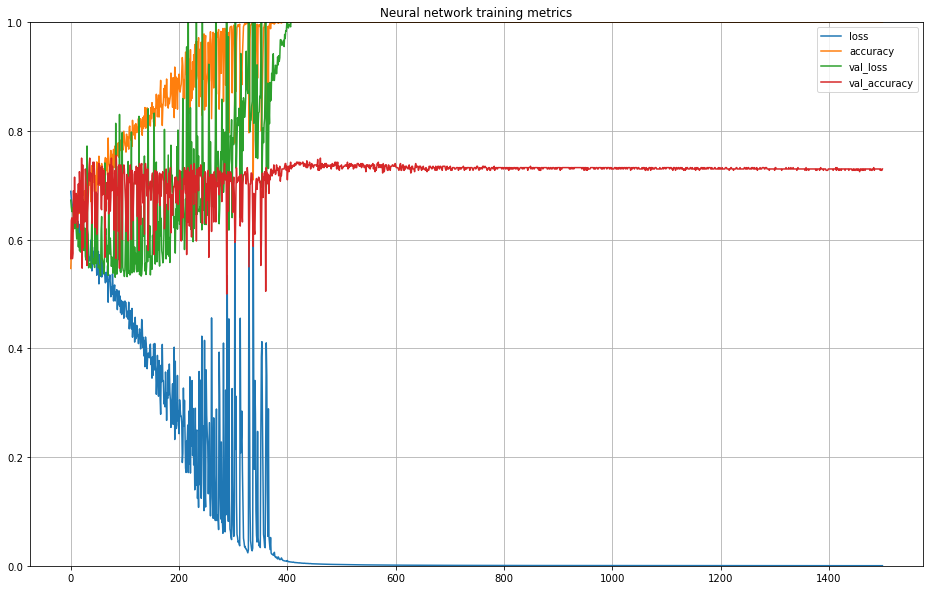

In [43]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.show()

> If the loss does not look like it has reached a minimum (being stable on the end), it suggests we can train the network further.

> It is normal that the accuracy for the training set is higher than for the validation set, but they might be close. If not, there is overfitting!

#### Confusion matrix

In [44]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

In [105]:
def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value 
    cellColoursTF=plt.cm.Blues([
        [ (vals['TP']+vals['TN'])/testExamplesNumber, (vals['FP']+vals['FN'])/testExamplesNumber ] for _, vals in confusionTFPN.items()
    ])
    cellColourPos=plt.cm.Greens([
        [ vals['TP']/(vals['TP']+vals['FP']), vals['FP']/(vals['TP']+vals['FP']) ] for _, vals in confusionTFPN.items()
    ])
    cellColourNeg=plt.cm.Reds([
        [ vals['TN']/(vals['TN']+vals['FN']), vals['FN']/(vals['TN']+vals['FN']) ] for _, vals in confusionTFPN.items()
    ])
    
    cellColours = [
        [
            cellColourPos[i][0],
            cellColourNeg[i][0],
            cellColoursTF[i][0],
            cellColourPos[i][1],
            cellColourNeg[i][1],
            cellColoursTF[i][1],
            [0, 0, 0, 0]
        ]
        for i in range(len(rows))
    ]
    
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)
    

In [106]:
# Get y predicted for test data set
predict = model.predict(X_test)
y_pred = np.array([np.argmax(p) for p in predict])

# Compute confusions
confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)

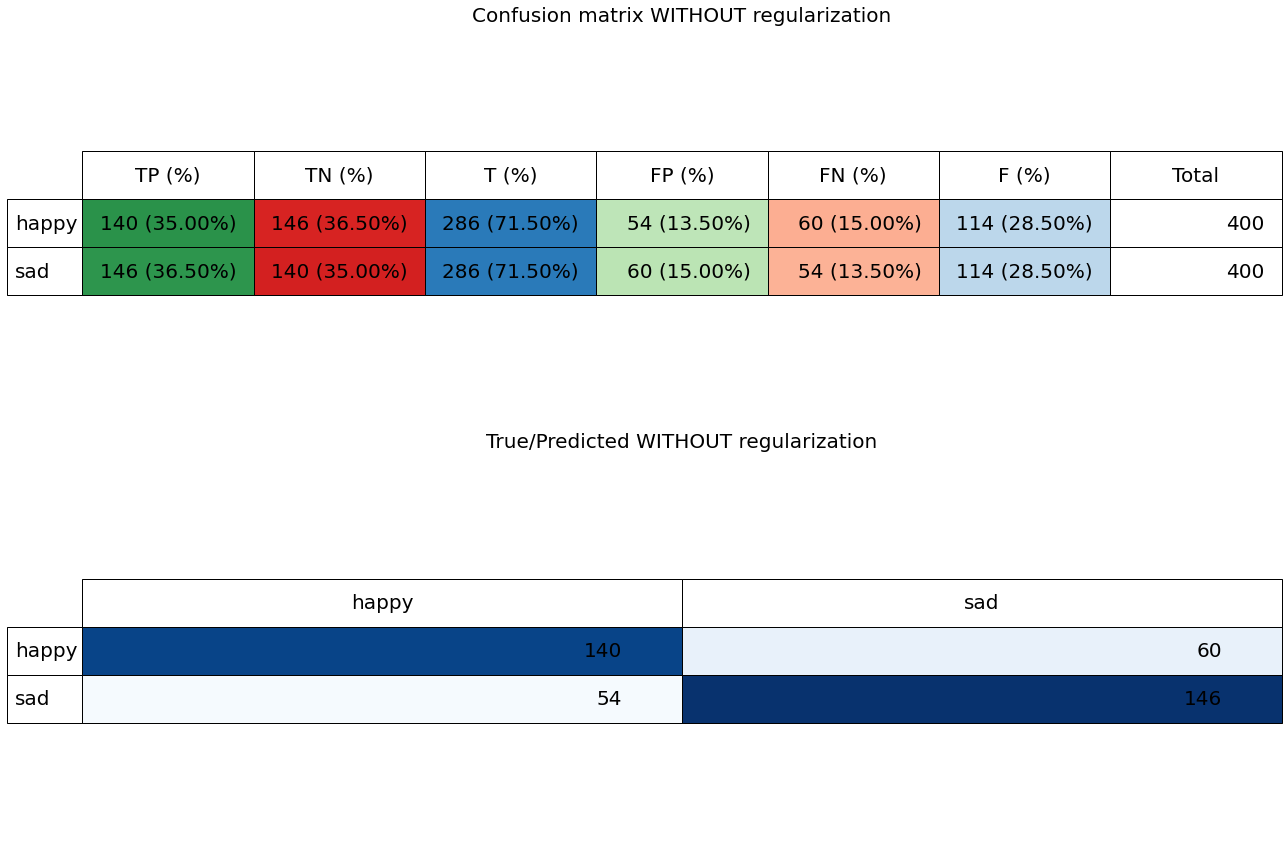

In [107]:
# Display as table
fig, axs = plt.subplots(2,1)

outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")


fig.set_size_inches(18,6*len(labelNames))
fig.subplots_adjust(left=0.2, top=20)
fig.tight_layout()